In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

In [45]:
df = pd.read_csv('store_item_transaction_data.csv')

In [46]:
df.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Year,Quarter,Product_Name,Product_Category,Product_Cost,Product_Price,Month,Actual_Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Revenue,xRevenue,Profit
0,1,2022-01-01,24,4,1,2022,1,Chutes & Ladders,Games,9.99,12.99,1,12.39,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.39,12.99,2.40
1,2,2022-01-01,28,1,1,2022,1,Action Figure,Toys,9.99,15.99,1,15.83,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,15.83,15.99,5.84
2,3,2022-01-01,6,8,1,2022,1,Deck Of Cards,Games,3.99,6.99,1,6.74,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,6.74,6.99,2.75
3,4,2022-01-01,48,7,1,2022,1,Dart Gun,Sports & Outdoors,11.99,15.99,1,14.97,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,14.97,15.99,2.98
4,5,2022-01-01,44,18,1,2022,1,Lego Bricks,Toys,34.99,38.99,1,38.73,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,38.73,38.99,3.74


In [47]:
print("Data Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

Data Types:
 Sale_ID                   int64
Date                     object
Store_ID                  int64
Product_ID                int64
Units                     int64
Year                      int64
Quarter                   int64
Product_Name             object
Product_Category         object
Product_Cost            float64
Product_Price           float64
Month                     int64
Actual_Product_Price    float64
Store_Name               object
Store_City               object
Store_Location           object
Store_Open_Date          object
Revenue                 float64
xRevenue                float64
Profit                  float64
dtype: object

Summary Statistics:
              Sale_ID       Store_ID     Product_ID          Units  \
count  829262.000000  829262.000000  829262.000000  829262.000000   
mean   414631.500000      25.277034      15.014149       1.315103   
std    239387.463803      14.352573       9.869417       0.830701   
min         1.000000       1.000000

In [48]:
# 2. Convert 'Date' columns to datetime for proper handling
date_columns = ['Date', 'Store_Open_Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
print(df['Date'].head())
print(df['Store_Open_Date'].head())

0   2022-01-01
1   2022-01-01
2   2022-01-01
3   2022-01-01
4   2022-01-01
Name: Date, dtype: datetime64[ns]
0   2010-07-31
1   2011-04-01
2   2003-12-13
3   2016-03-23
4   2014-12-27
Name: Store_Open_Date, dtype: datetime64[ns]


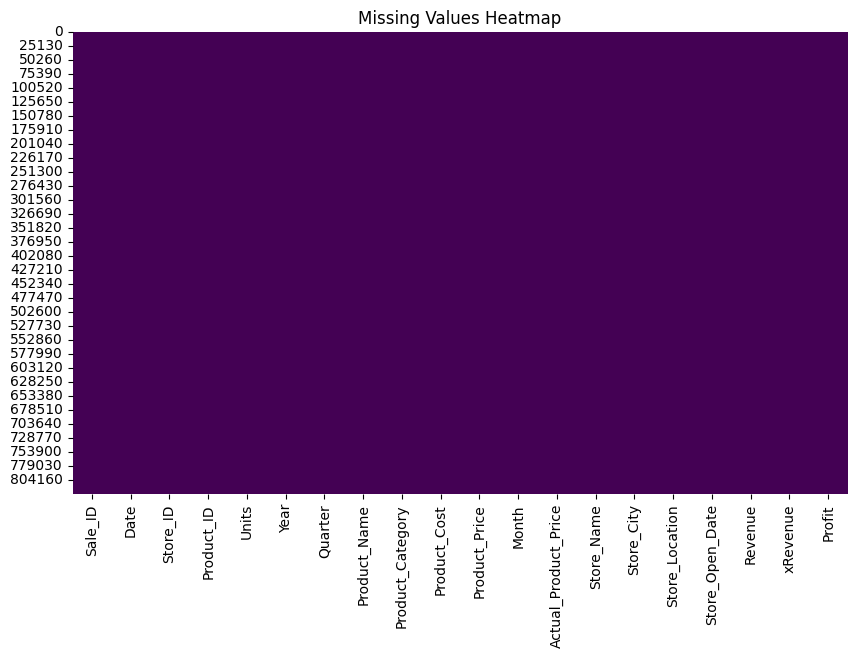

In [49]:
# 3. Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

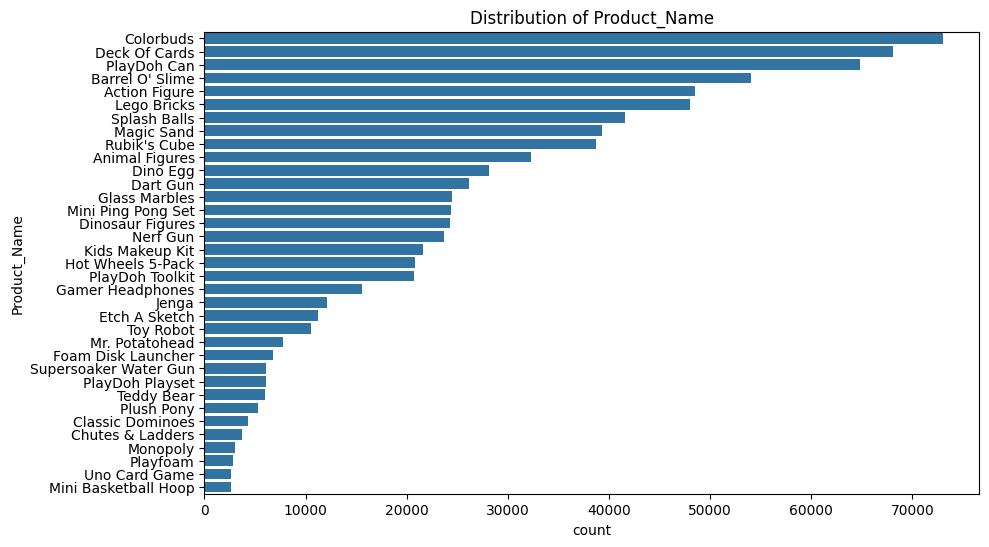

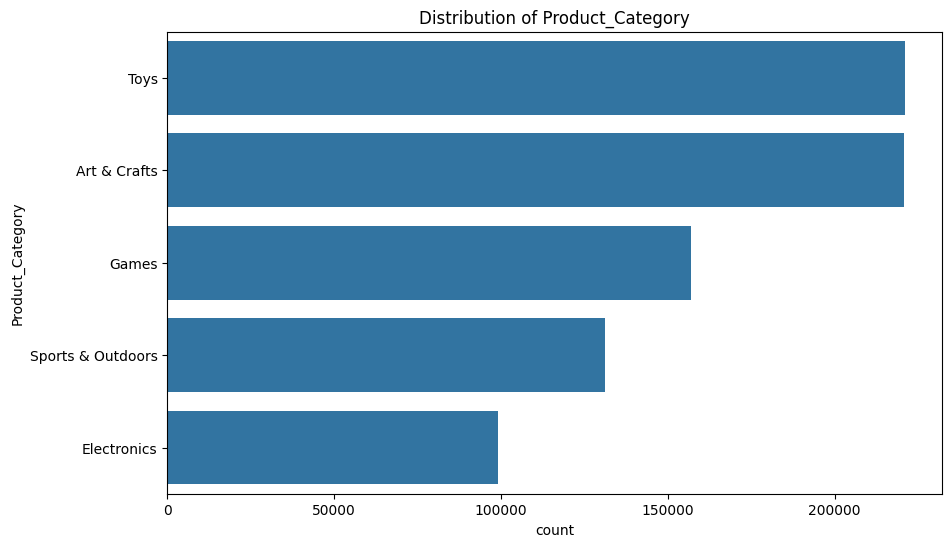

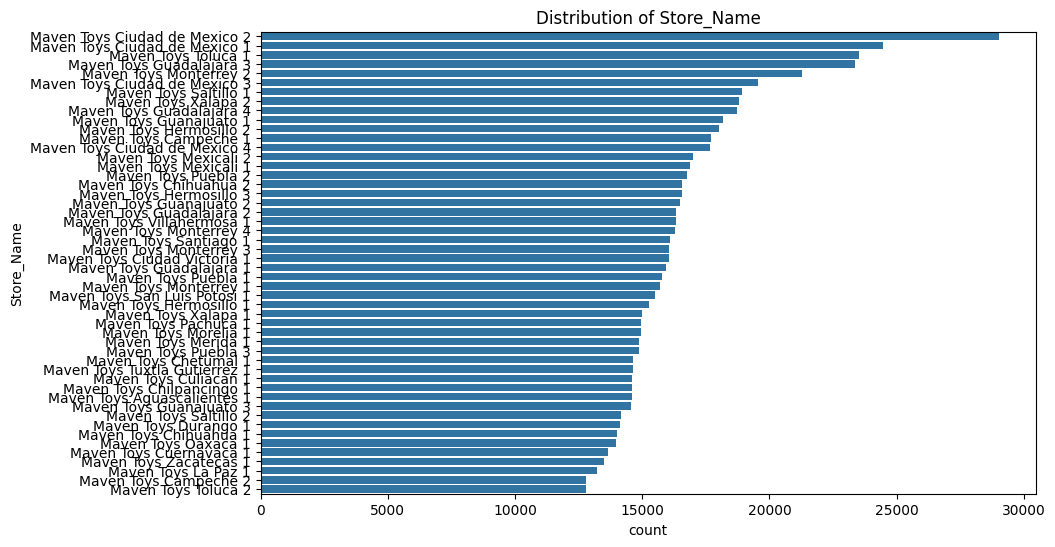

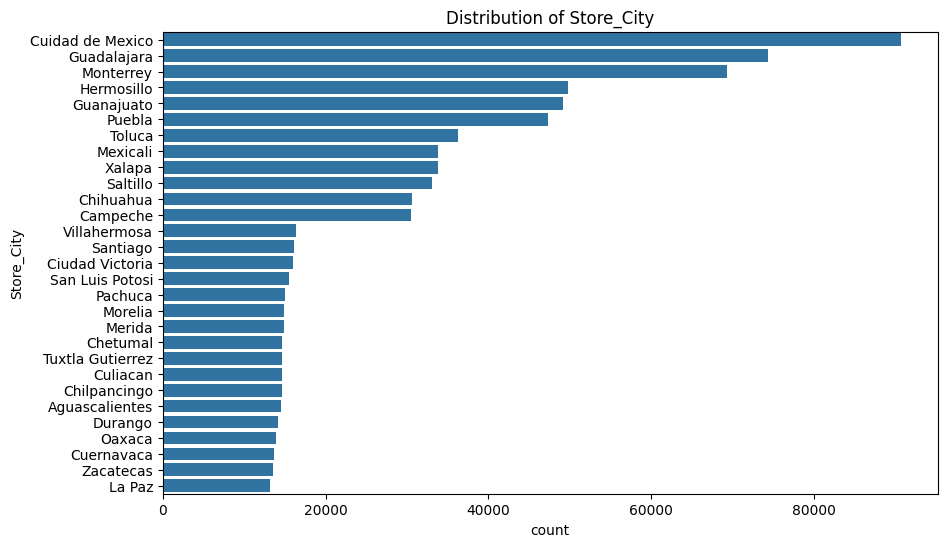

In [50]:
# 4. Visualize Categorical Variables
categorical_columns = ['Product_Name', 'Product_Category', 'Store_Name', 'Store_City']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

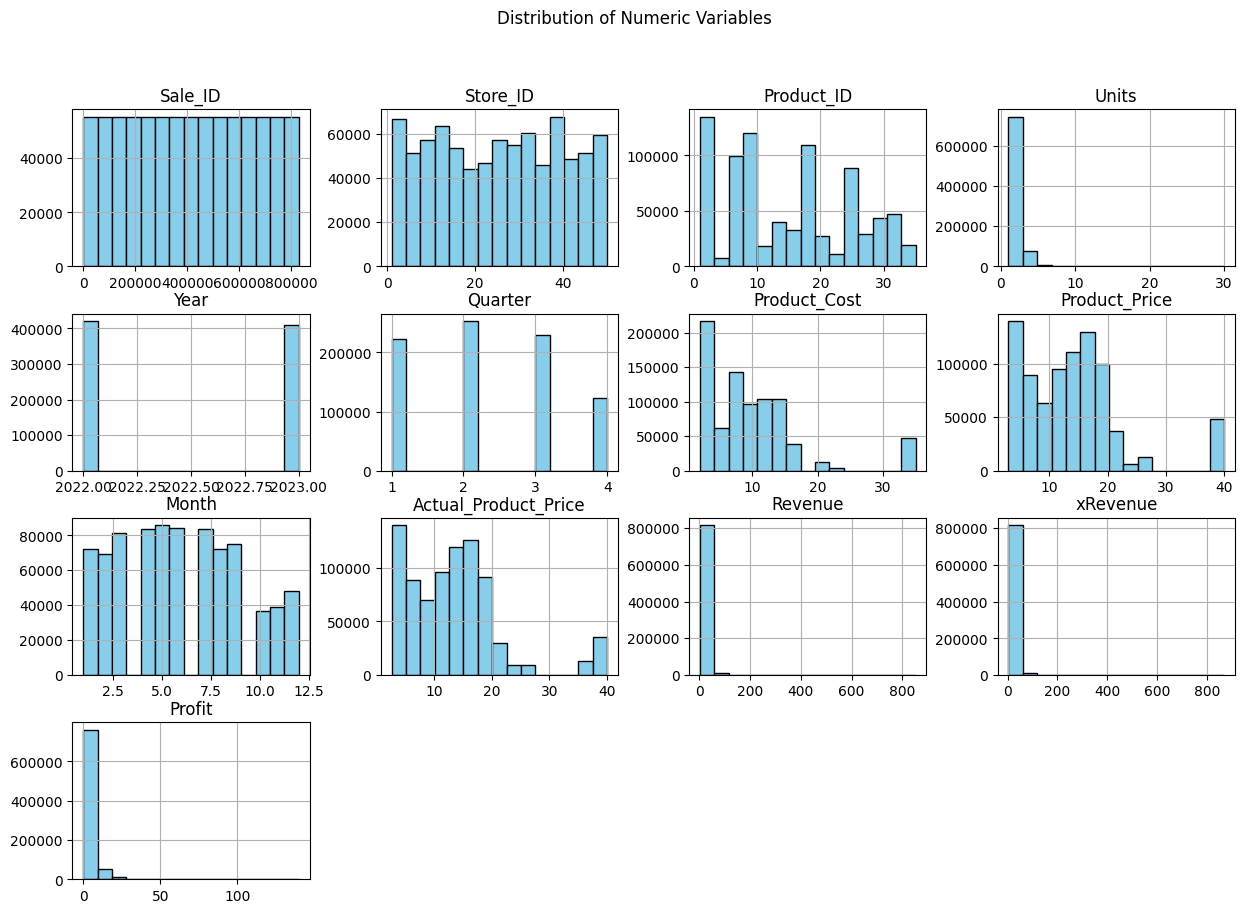

In [51]:
# 5. Distribution of Numeric Variables
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Variables")
plt.show()

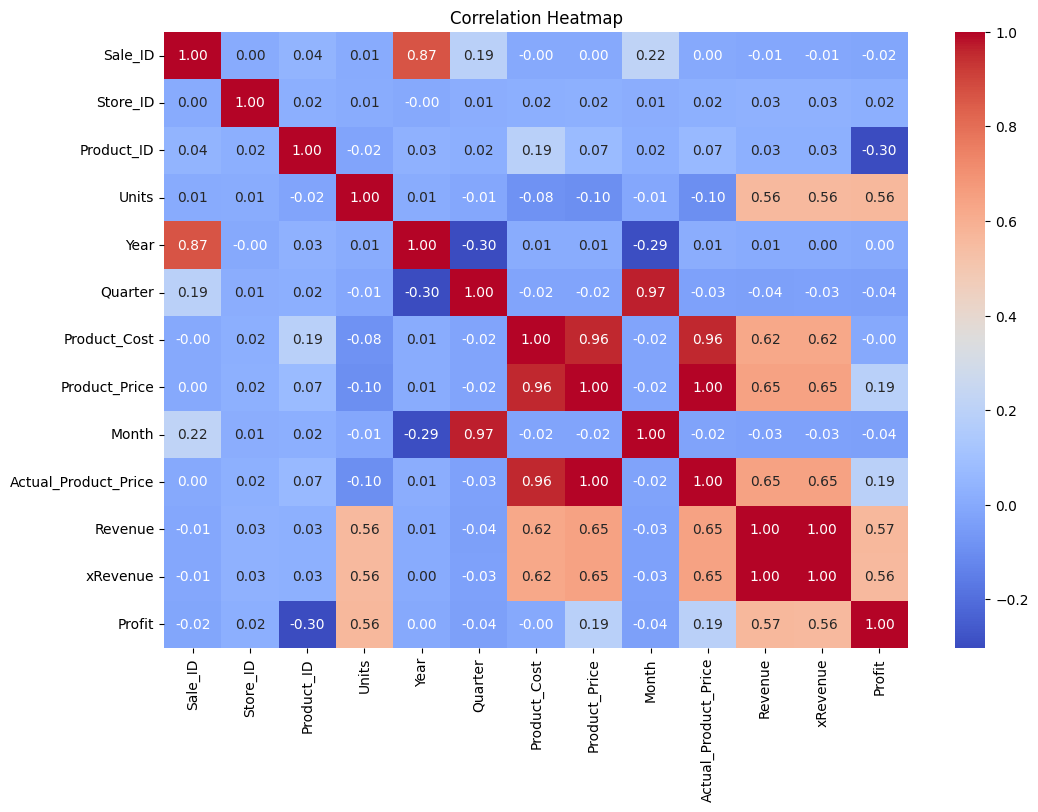

In [52]:
# 6. Correlation Heatmap for Numeric Variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

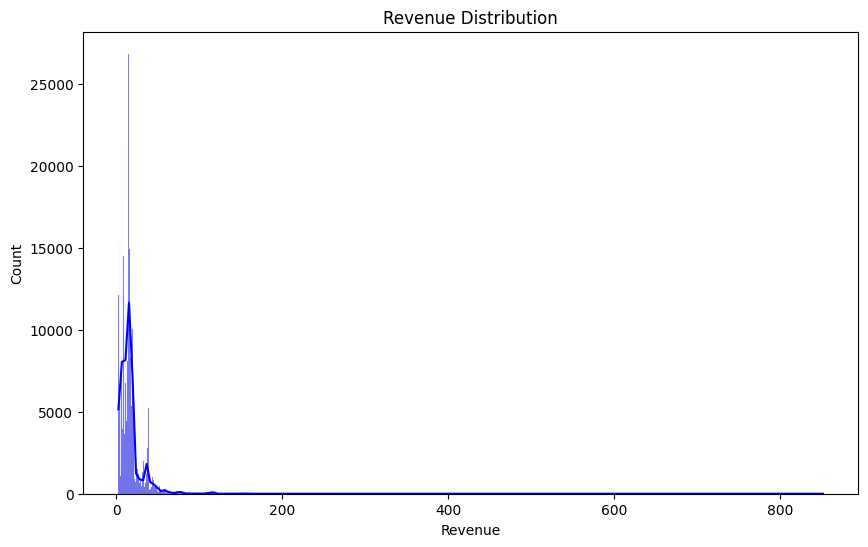

In [53]:
# 7. Revenue Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue'], kde=True, color='blue')
plt.title("Revenue Distribution")
plt.show()

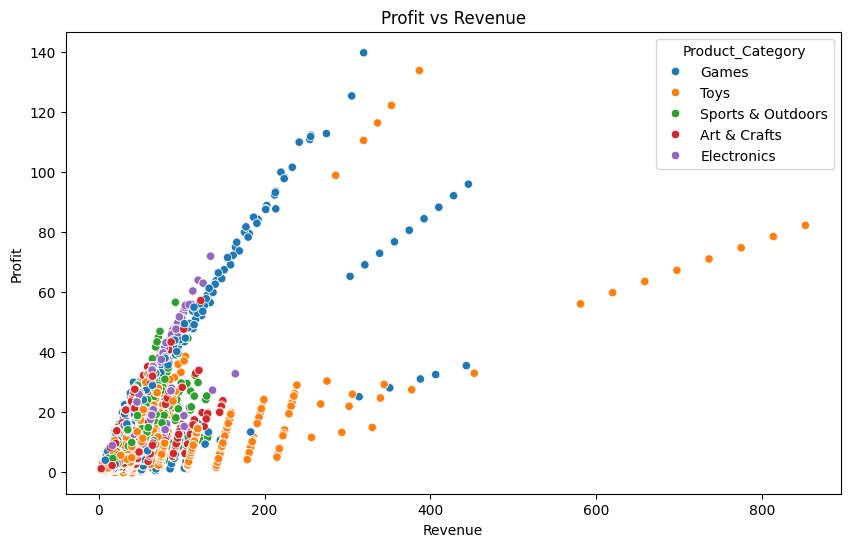

In [54]:
# 8. Profit vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Revenue', y='Profit', hue='Product_Category')
plt.title("Profit vs Revenue")
plt.show()

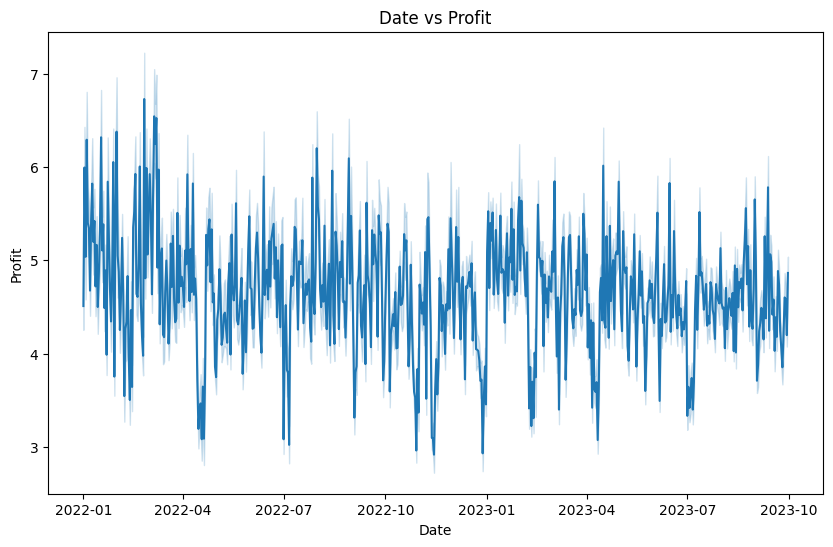

In [55]:
# 8. Date vs Profit
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Profit')
plt.xlabel("Date")
plt.ylabel("Profit")
plt.title("Date vs Profit")
plt.show()

## Top Revenue generating cities




In [56]:
# Group by City to calculate total revenue per city
top_revenue_cities = (
    df.groupby('Store_City')['Revenue']
    .sum()
    .reset_index()
    .sort_values(by='Revenue', ascending=False)
    .head(5)  # Select the top 5 cities
)

print(top_revenue_cities)


          Store_City     Revenue
7   Cuidad de Mexico  1636099.81
10       Guadalajara  1306909.46
16         Monterrey  1246888.47
12        Hermosillo   893832.56
11        Guanajuato   859521.46


<ipython-input-58-447be493cc81>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store_City', y='Revenue', data=top_revenue_cities, palette='viridis')


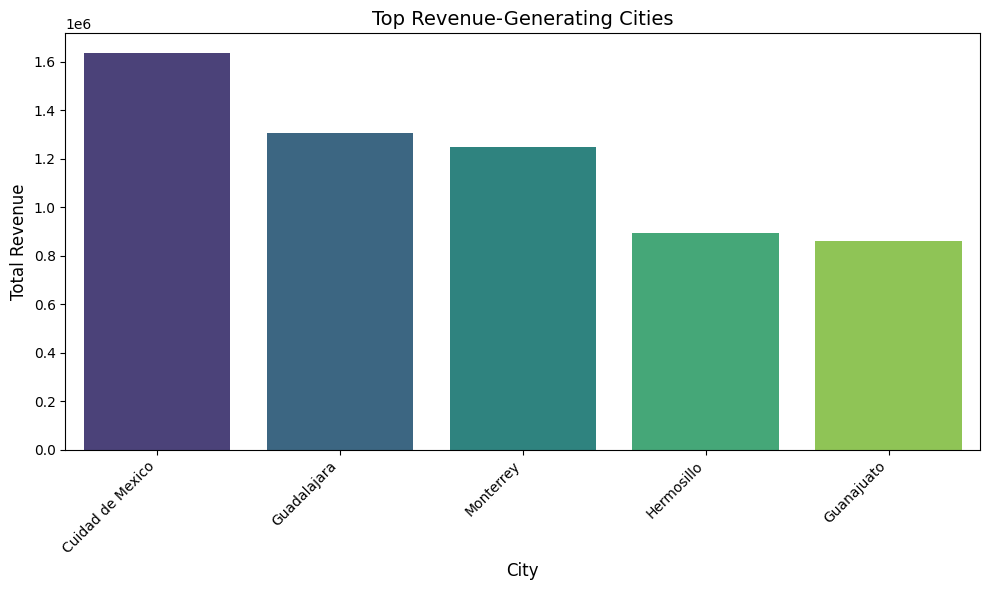

In [58]:
# Plotting the top revenue-generating cities
plt.figure(figsize=(10, 6))
sns.barplot(x='Store_City', y='Revenue', data=top_revenue_cities, palette='viridis')
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.title('Top Revenue-Generating Cities', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate city names for better readability
plt.tight_layout()
plt.show()


## Top Selling items




In [59]:
# Group by Product_ID and Product_Name, sum up Units
top_selling_items = (
    df.groupby(['Product_ID', 'Product_Name'])['Units']
    .sum()
    .reset_index()
)

# Sort by the total sum of Units and select the top 5 products
top_selling_items = top_selling_items.sort_values(by='Units', ascending=False).head(5)

print(top_selling_items)




    Product_ID     Product_Name   Units
5            6        Colorbuds  104368
24          25      PlayDoh Can  103128
2            3  Barrel O' Slime   91663
7            8    Deck Of Cards   84034
18          19       Magic Sand   60598


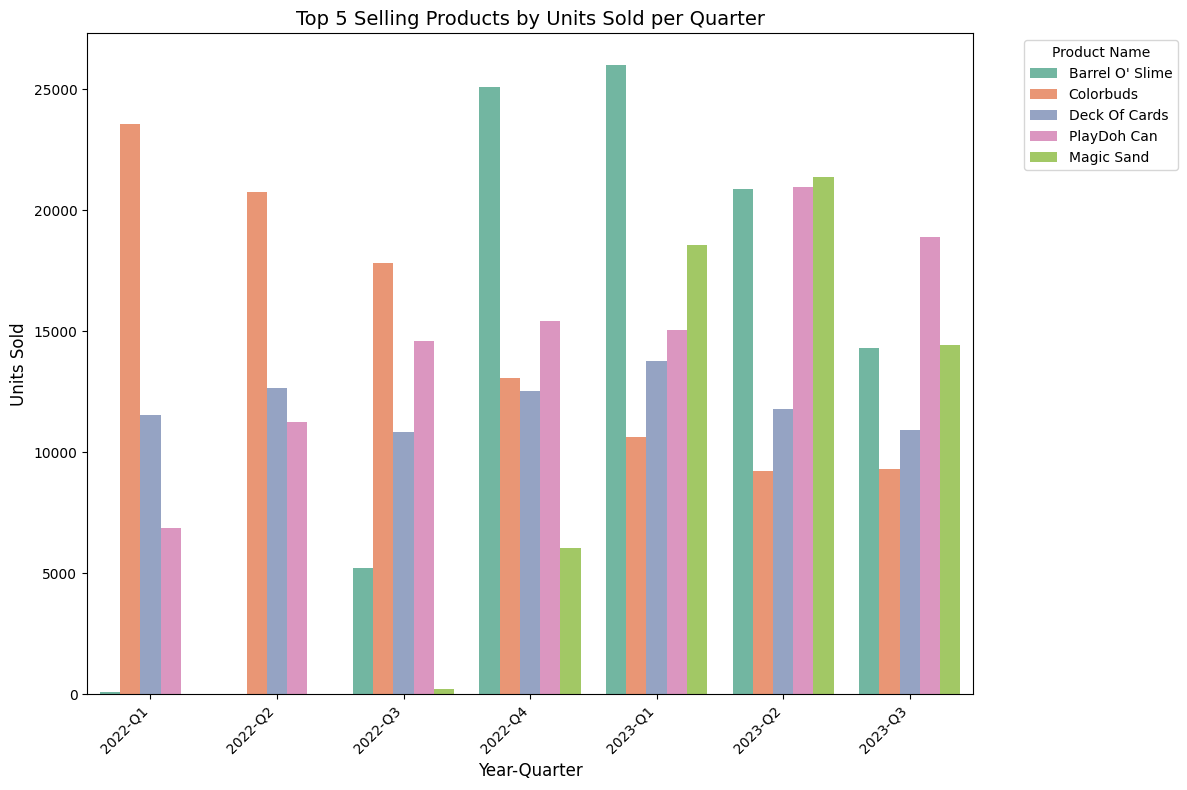

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Month is an integer column
df['Month'] = df['Month'].astype(int)

# Add a Quarter column based on the Month
df['Quarter'] = (df['Month'] - 1) // 3 + 1

# Create a 'Year-Quarter' column for clarity in plotting
df['Year-Quarter'] = df['Year'].astype(str) + "-Q" + df['Quarter'].astype(str)

# Identify top 5 products
top_selling_items = (
    df.groupby(['Product_ID', 'Product_Name'])['Units']
    .sum()
    .reset_index()
    .sort_values(by='Units', ascending=False)
    .head(5)
)

# Filter the data for the top 5 products
top_5_product_names = top_selling_items['Product_Name']
filtered_data = df[df['Product_Name'].isin(top_5_product_names)]

# Group by Year, Quarter, and Product_Name
grouped_data = (
    filtered_data.groupby(['Year', 'Quarter', 'Product_Name'])['Units']
    .sum()
    .reset_index()
)

# Add a 'Year-Quarter' column to grouped_data for the x-axis
grouped_data['Year-Quarter'] = grouped_data['Year'].astype(str) + "-Q" + grouped_data['Quarter'].astype(str)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(
    data=grouped_data,
    x='Year-Quarter',
    y='Units',
    hue='Product_Name',
    palette='Set2'
)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.title('Top 5 Selling Products by Units Sold per Quarter', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for better readability
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Top selling items based on store location

In [61]:
# Group by Store_Location and Product_Name to calculate total Units
top_selling_by_location = (
    df.groupby(['Store_Location', 'Product_Name'])['Units']
    .sum()
    .reset_index()
    .sort_values(by=['Store_Location', 'Units'], ascending=[True, False])
)

# For each location, get the top 5 products
top_selling_by_location = top_selling_by_location.groupby('Store_Location').head(5)

print(top_selling_by_location)


    Store_Location     Product_Name  Units
5          Airport        Colorbuds  11482
24         Airport      PlayDoh Can   8114
13         Airport    Glass Marbles   7929
7          Airport    Deck Of Cards   7782
30         Airport     Splash Balls   6531
40      Commercial        Colorbuds  30495
59      Commercial      PlayDoh Can  20369
42      Commercial    Deck Of Cards  19951
65      Commercial     Splash Balls  15294
37      Commercial  Barrel O' Slime  14778
94        Downtown      PlayDoh Can  62351
72        Downtown  Barrel O' Slime  58115
75        Downtown        Colorbuds  51287
77        Downtown    Deck Of Cards  46347
88        Downtown       Magic Sand  37657
107    Residential  Barrel O' Slime  12480
129    Residential      PlayDoh Can  12294
110    Residential        Colorbuds  11104
112    Residential    Deck Of Cards   9954
122    Residential      Lego Bricks   7824


## Top selling items by product category

In [62]:
# Group by Product_Category and Product_Name to calculate total Units
top_selling_by_category = (
    df.groupby(['Product_Category', 'Product_Name'])['Units']
    .sum()
    .reset_index()
    .sort_values(by=['Product_Category', 'Units'], ascending=[True, False])
)

# For each category, get the top 5 products
top_selling_by_category = top_selling_by_category.groupby('Product_Category').head(5)

print(top_selling_by_category)

     Product_Category        Product_Name   Units
4        Art & Crafts         PlayDoh Can  103128
0        Art & Crafts     Barrel O' Slime   91663
3        Art & Crafts          Magic Sand   60598
2        Art & Crafts     Kids Makeup Kit   24433
6        Art & Crafts     PlayDoh Toolkit   23128
8         Electronics           Colorbuds  104368
9         Electronics    Gamer Headphones   17958
10        Electronics           Toy Robot   11749
13              Games       Deck Of Cards   84034
17              Games        Rubik's Cube   45672
14              Games       Glass Marbles   37518
15              Games               Jenga   13054
12              Games    Classic Dominoes    4471
24  Sports & Outdoors        Splash Balls   60248
22  Sports & Outdoors  Mini Ping Pong Set   33604
19  Sports & Outdoors            Dart Gun   31588
23  Sports & Outdoors            Nerf Gun   26543
20  Sports & Outdoors  Foam Disk Launcher    7620
31               Toys         Lego Bricks   59737


## Top selling items by month

In [63]:
# Group by Month and Product_Name to calculate total Units
top_selling_by_month = (
    df.groupby(['Month', 'Product_Name'])['Units']
    .sum()
    .reset_index()
    .sort_values(by=['Month', 'Units'], ascending=[True, False])
)

# For each month, get the top product
top_selling_by_month = top_selling_by_month.groupby('Month').first().reset_index()

print(top_selling_by_month)

    Month     Product_Name  Units
0       1        Colorbuds  11776
1       2        Colorbuds  10928
2       3        Colorbuds  11503
3       4        Colorbuds  10636
4       5      PlayDoh Can  10021
5       6      PlayDoh Can  11993
6       7      PlayDoh Can  12276
7       8      PlayDoh Can  10947
8       9      PlayDoh Can  10309
9      10  Barrel O' Slime   7574
10     11  Barrel O' Slime   8656
11     12  Barrel O' Slime   8870


# Top profitable items

In [81]:
# Group by Product_ID and Product_Name to sum up Profits
top_profitable_items = (
    df.groupby(['Product_ID', 'Product_Name'])['Profit']
    .sum()
    .reset_index()
    .sort_values(by='Profit', ascending=False)
    .head(5)
)

print(top_profitable_items)

    Product_ID     Product_Name     Profit
5            6        Colorbuds  806518.64
0            1    Action Figure  347825.31
7            8    Deck Of Cards  251917.38
2            3  Barrel O' Slime  217607.83
17          18      Lego Bricks  191680.99


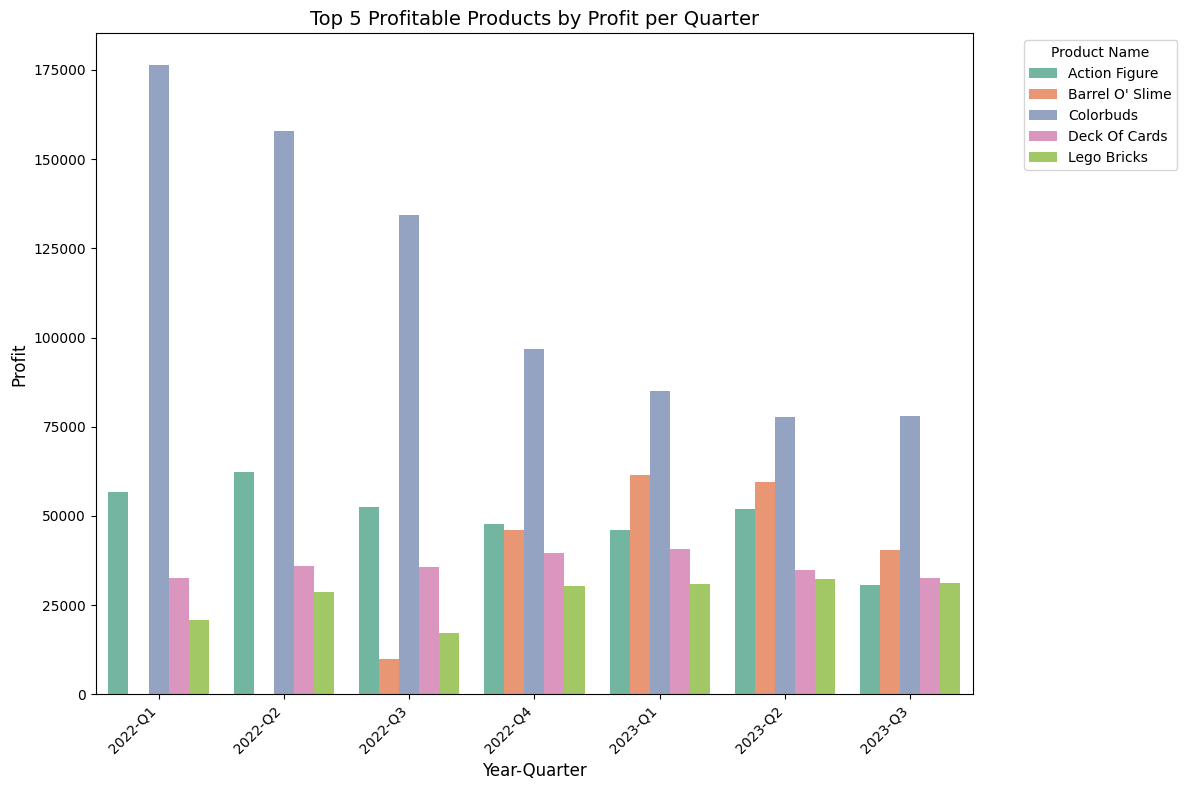

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Month is an integer column
df['Month'] = df['Month'].astype(int)

# Add a Quarter column based on the Month
df['Quarter'] = (df['Month'] - 1) // 3 + 1

# Create a 'Year-Quarter' column for clarity in plotting
df['Year-Quarter'] = df['Year'].astype(str) + "-Q" + df['Quarter'].astype(str)

# Identify top 5 profitable products
top_profitable_items = (
    df.groupby(['Product_ID', 'Product_Name'])['Profit']
    .sum()
    .reset_index()
    .sort_values(by='Profit', ascending=False)
    .head(5)
)

# Filter the data for the top 5 profitable products
top_5_profitable_product_names = top_profitable_items['Product_Name']
filtered_data = df[df['Product_Name'].isin(top_5_profitable_product_names)]

# Group by Year, Quarter, and Product_Name to calculate profits
grouped_data = (
    filtered_data.groupby(['Year', 'Quarter', 'Product_Name'])['Profit']
    .sum()
    .reset_index()
)

# Add a 'Year-Quarter' column to grouped_data for the x-axis
grouped_data['Year-Quarter'] = grouped_data['Year'].astype(str) + "-Q" + grouped_data['Quarter'].astype(str)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(
    data=grouped_data,
    x='Year-Quarter',
    y='Profit',
    hue='Product_Name',
    palette='Set2'
)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.title('Top 5 Profitable Products by Profit per Quarter', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for better readability
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Top revenue generating items

In [83]:
top_revenue_items = (
    df.groupby(['Product_ID', 'Product_Name'])['Revenue']
    .sum()
    .reset_index()
    .sort_values(by='Revenue', ascending=False)
    .head(5)
)

print(top_revenue_items)

    Product_ID   Product_Name     Revenue
17          18    Lego Bricks  2281878.62
5            6      Colorbuds  1553544.56
18          19     Magic Sand   964886.18
0            1  Action Figure   963467.73
29          30   Rubik's Cube   859579.58


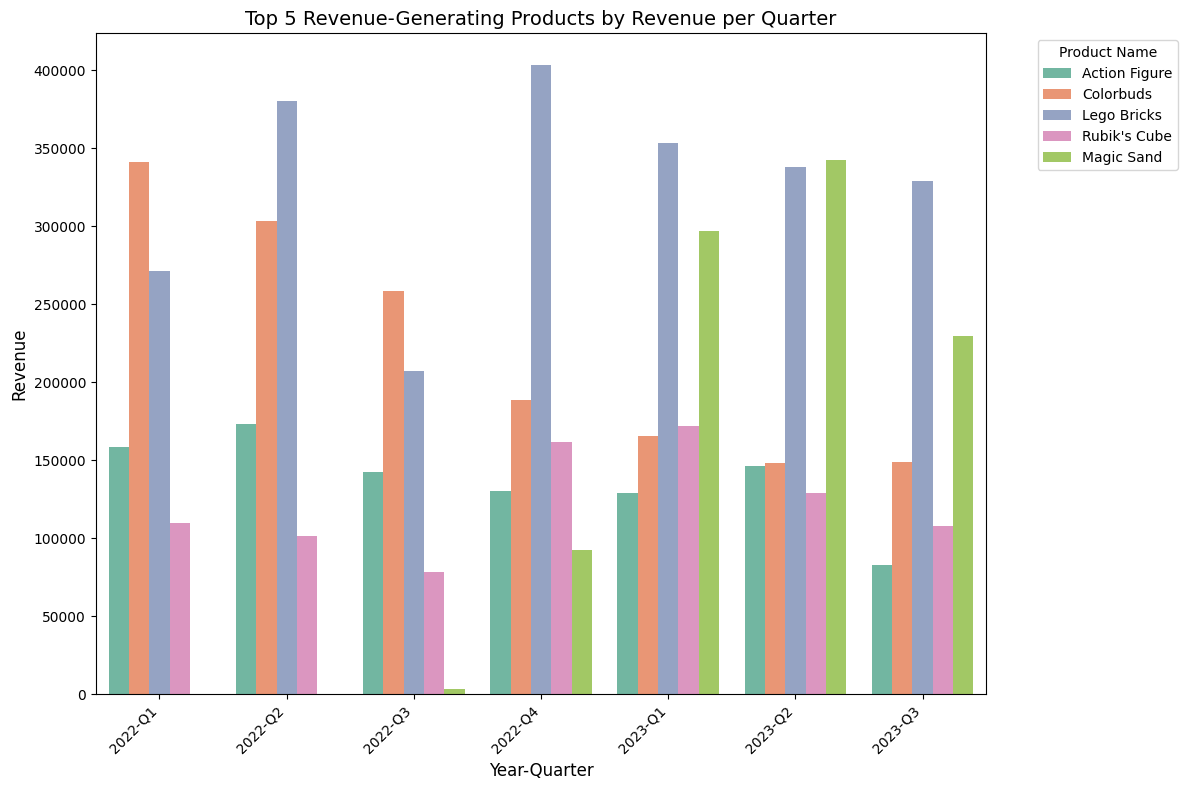

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Month is an integer column
df['Month'] = df['Month'].astype(int)

# Add a Quarter column based on the Month
df['Quarter'] = (df['Month'] - 1) // 3 + 1

# Create a 'Year-Quarter' column for clarity in plotting
df['Year-Quarter'] = df['Year'].astype(str) + "-Q" + df['Quarter'].astype(str)

# Identify top 5 revenue-generating products
top_revenue_items = (
    df.groupby(['Product_ID', 'Product_Name'])['Revenue']
    .sum()
    .reset_index()
    .sort_values(by='Revenue', ascending=False)
    .head(5)
)

# Filter the data for the top 5 revenue-generating products
top_5_revenue_product_names = top_revenue_items['Product_Name']
filtered_data = df[df['Product_Name'].isin(top_5_revenue_product_names)]

# Group by Year, Quarter, and Product_Name to calculate revenue
grouped_data = (
    filtered_data.groupby(['Year', 'Quarter', 'Product_Name'])['Revenue']
    .sum()
    .reset_index()
)

# Add a 'Year-Quarter' column to grouped_data for the x-axis
grouped_data['Year-Quarter'] = grouped_data['Year'].astype(str) + "-Q" + grouped_data['Quarter'].astype(str)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(
    data=grouped_data,
    x='Year-Quarter',
    y='Revenue',
    hue='Product_Name',
    palette='Set2'
)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Top 5 Revenue-Generating Products by Revenue per Quarter', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for better readability
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Most profitable items by month

In [69]:
# Group by Month and Product_Name to calculate total Profit
most_profitable_by_month = (
    df.groupby(['Month', 'Product_Name'])['Profit']
    .sum()
    .reset_index()
    .sort_values(by=['Month', 'Profit'], ascending=[True, False])
)

# For each month, get the most profitable product
most_profitable_by_month = most_profitable_by_month.groupby('Month').first().reset_index()

print(most_profitable_by_month)


    Month Product_Name    Profit
0       1    Colorbuds  91527.60
1       2    Colorbuds  81641.59
2       3    Colorbuds  88399.01
3       4    Colorbuds  82025.84
4       5    Colorbuds  77472.09
5       6    Colorbuds  76258.58
6       7    Colorbuds  77355.58
7       8    Colorbuds  75730.00
8       9    Colorbuds  59230.96
9      10    Colorbuds  35167.59
10     11    Colorbuds  31602.76
11     12    Colorbuds  30107.04


## Most profitable items by product category

In [70]:
# Group by Product_Category and Product_Name to calculate total Profit
most_profitable_by_category = (
    df.groupby(['Product_Category', 'Product_Name'])['Profit']
    .sum()
    .reset_index()
    .sort_values(by=['Product_Category', 'Profit'], ascending=[True, False])
)

# For each category, get the most profitable product
most_profitable_by_category = most_profitable_by_category.groupby('Product_Category').first().reset_index()

print(most_profitable_by_category)

    Product_Category        Product_Name     Profit
0       Art & Crafts     Barrel O' Slime  217607.83
1        Electronics           Colorbuds  806518.64
2              Games       Deck Of Cards  251917.38
3  Sports & Outdoors  Mini Ping Pong Set  127053.38
4               Toys       Action Figure  347825.31


## Most profitable item by store_location

In [71]:
# Group by Store_Location and Product_Name to calculate total Profit
most_profitable_by_location = (
    df.groupby(['Store_Location', 'Product_Name'])['Profit']
    .sum()
    .reset_index()
    .sort_values(by=['Store_Location', 'Profit'], ascending=[True, False])
)

# For each store location, get the most profitable product
most_profitable_by_location = most_profitable_by_location.groupby('Store_Location').first().reset_index()

print(most_profitable_by_location)

  Store_Location Product_Name     Profit
0        Airport    Colorbuds   88273.59
1     Commercial    Colorbuds  235400.00
2       Downtown    Colorbuds  396547.04
3    Residential    Colorbuds   86298.01


## Most profitable item by city

In [72]:
# Group by Store_City and Product_Name to calculate total Profit
most_profitable_by_city = (
    df.groupby(['Store_City', 'Product_Name'])['Profit']
    .sum()
    .reset_index()
    .sort_values(by=['Store_City', 'Profit'], ascending=[True, False])
)

# For each city, get the most profitable product
most_profitable_by_city = most_profitable_by_city.groupby('Store_City').first().reset_index()

print(most_profitable_by_city)

          Store_City     Product_Name    Profit
0     Aguascalientes        Colorbuds  16080.90
1           Campeche        Colorbuds  19400.99
2           Chetumal        Colorbuds  14908.94
3          Chihuahua        Colorbuds  22662.69
4       Chilpancingo        Colorbuds  16124.43
5    Ciudad Victoria        Colorbuds  26487.65
6         Cuernavaca    Action Figure   5697.19
7   Cuidad de Mexico        Colorbuds  89507.01
8           Culiacan        Colorbuds   6325.52
9            Durango        Colorbuds  14448.31
10       Guadalajara        Colorbuds  82980.86
11        Guanajuato        Colorbuds  46045.24
12        Hermosillo        Colorbuds  76389.74
13            La Paz        Colorbuds   8134.15
14            Merida        Colorbuds  12211.07
15          Mexicali        Colorbuds  50729.57
16         Monterrey        Colorbuds  71182.66
17           Morelia    Glass Marbles  24586.51
18            Oaxaca  Barrel O' Slime   6907.37
19           Pachuca    Action Figure   

## Top revenue generating items by month

In [73]:
# Group by Month and Product_Name to calculate total Revenue
top_revenue_by_month = (
    df.groupby(['Month', 'Product_Name'])['Revenue']
    .sum()
    .reset_index()
    .sort_values(by=['Month', 'Revenue'], ascending=[True, False])
)

# For each month, get the product with the highest revenue
top_revenue_by_month = top_revenue_by_month.groupby('Month').first().reset_index()

print(top_revenue_by_month)

    Month Product_Name    Revenue
0       1  Lego Bricks  177096.44
1       2  Lego Bricks  194629.90
2       3  Lego Bricks  252989.58
3       4  Lego Bricks  240679.90
4       5  Lego Bricks  236989.88
5       6  Lego Bricks  240269.56
6       7  Lego Bricks  156033.74
7       8    Colorbuds  144264.67
8       9  Lego Bricks  240088.62
9      10  Lego Bricks  133672.70
10     11  Lego Bricks  130361.04
11     12  Lego Bricks  139307.50


## Top revenue generating items by product_category

In [74]:
# Group by Product_Category and Product_Name to calculate total Revenue
top_revenue_by_category = (
    df.groupby(['Product_Category', 'Product_Name'])['Revenue']
    .sum()
    .reset_index()
    .sort_values(by=['Product_Category', 'Revenue'], ascending=[True, False])
)

# For each category, get the product with the highest revenue
top_revenue_by_category = top_revenue_by_category.groupby('Product_Category').first().reset_index()

print(top_revenue_by_category)

    Product_Category  Product_Name     Revenue
0       Art & Crafts    Magic Sand   964886.18
1        Electronics     Colorbuds  1553544.56
2              Games  Rubik's Cube   859579.58
3  Sports & Outdoors  Splash Balls   535092.36
4               Toys   Lego Bricks  2281878.62


## Top revenue generating items by store location

In [75]:
top_revenue_by_location = (
    df.groupby(['Store_Location', 'Product_Name'])['Revenue']
    .sum()
    .reset_index()
    .sort_values(by=['Store_Location', 'Revenue'], ascending=[True, False])
)

# For each store location, get the product with the highest revenue
top_revenue_by_location = top_revenue_by_location.groupby('Store_Location').first().reset_index()

print(top_revenue_by_location)

  Store_Location Product_Name     Revenue
0        Airport  Lego Bricks   195218.31
1     Commercial  Lego Bricks   505744.11
2       Downtown  Lego Bricks  1282212.27
3    Residential  Lego Bricks   298703.93


## Top revenue generating items by city

In [76]:
# Group by Store_City and Product_Name to calculate total Revenue
top_revenue_by_city = (
    df.groupby(['Store_City', 'Product_Name'])['Revenue']
    .sum()
    .reset_index()
    .sort_values(by=['Store_City', 'Revenue'], ascending=[True, False])
)

# For each city, get the product with the highest revenue
top_revenue_by_city = top_revenue_by_city.groupby('Store_City').first().reset_index()

print(top_revenue_by_city)

          Store_City        Product_Name    Revenue
0     Aguascalientes         Lego Bricks   38919.04
1           Campeche         Lego Bricks   55028.17
2           Chetumal         Lego Bricks   49915.85
3          Chihuahua  Mini Ping Pong Set   66228.40
4       Chilpancingo         Lego Bricks   43083.92
5    Ciudad Victoria         Lego Bricks   56412.20
6         Cuernavaca         Lego Bricks   42021.90
7   Cuidad de Mexico         Lego Bricks  254927.39
8           Culiacan         Lego Bricks   33354.25
9            Durango         Lego Bricks   29081.31
10       Guadalajara         Lego Bricks  187624.26
11        Guanajuato         Lego Bricks  196256.85
12        Hermosillo           Colorbuds  147253.10
13            La Paz         Lego Bricks   33936.80
14            Merida         Lego Bricks   31512.25
15          Mexicali           Colorbuds   97779.86
16         Monterrey         Lego Bricks  234986.95
17           Morelia       Glass Marbles   55255.31
18          

## Below we find most frequently sold pairs of products together

In [77]:
from itertools import combinations
from collections import Counter, defaultdict

# Group the data by Month, Store_ID, and Product_ID
grouped = df.groupby(['Month', 'Store_ID', 'Product_Name'], as_index=False)['Units'].sum()

# Create a dictionary to store aggregated product combinations by month
monthly_combinations = {}

# Iterate through each unique month
for date, group in grouped.groupby('Month'):
    # Create a counter for the month to track product pair frequencies
    month_counter = Counter()

    # Iterate through each store in the month
    for store_id, store_group in group.groupby('Store_ID'):
        # Get the list of product IDs sold at the store during the month
        products = store_group['Product_Name'].tolist()
        # Generate all combinations of products (pairs)
        combs = combinations(products, 2)
        # Aggregate counts of each combination across stores for the month
        month_counter.update(combs)

    # Store the aggregated counts in the monthly_combinations dictionary
    monthly_combinations[date] = month_counter

# Group product pairs by their frequency count
count_groups = defaultdict(list)

# Populate the count_groups dictionary with pairs and their counts
for month, counter in monthly_combinations.items():
    for comb, count in counter.items():
        count_groups[count].append(comb)

# Sort the count groups by frequency in descending order and take the top 5
top_pairs = sorted(count_groups.items(), key=lambda x: x[0], reverse=True)[:5]

# Display the results
for count, pairs in top_pairs:
    print(f"Pairs bought together {count} times:")
    print(pairs)
    print()



Pairs bought together 50 times:
[('Action Figure', 'Animal Figures'), ('Action Figure', "Barrel O' Slime"), ('Action Figure', 'Colorbuds'), ('Action Figure', 'Deck Of Cards'), ('Action Figure', 'PlayDoh Can'), ('Action Figure', "Rubik's Cube"), ('Action Figure', 'Splash Balls'), ('Animal Figures', "Barrel O' Slime"), ('Animal Figures', 'Colorbuds'), ('Animal Figures', 'Deck Of Cards'), ('Animal Figures', 'PlayDoh Can'), ('Animal Figures', "Rubik's Cube"), ('Animal Figures', 'Splash Balls'), ("Barrel O' Slime", 'Colorbuds'), ("Barrel O' Slime", 'Deck Of Cards'), ("Barrel O' Slime", 'PlayDoh Can'), ("Barrel O' Slime", "Rubik's Cube"), ("Barrel O' Slime", 'Splash Balls'), ('Colorbuds', 'Deck Of Cards'), ('Colorbuds', 'PlayDoh Can'), ('Colorbuds', "Rubik's Cube"), ('Colorbuds', 'Splash Balls'), ('Deck Of Cards', 'PlayDoh Can'), ('Deck Of Cards', "Rubik's Cube"), ('Deck Of Cards', 'Splash Balls'), ('PlayDoh Can', "Rubik's Cube"), ('PlayDoh Can', 'Splash Balls'), ("Rubik's Cube", 'Splash Bal

## Number of stores

In [78]:
total_unique_stores = df['Store_ID'].nunique()
print(df['Store_ID'].unique())

print(f"Total unique stores: {total_unique_stores}")

[24 28  6 48 44  1 40 19 38 21 34 37  5  8  3 33 30  4 41 10 16 36 39 32
 25 46 23 50 12 22 27  7 47 49 42 29 18  9 31 35 13 14 17  2 11 43 26 45
 15 20]
Total unique stores: 50


## Number of stores in each city

In [79]:
stores_per_city = df.groupby('Store_City')['Store_ID'].nunique().reset_index()

# Rename columns for clarity
stores_per_city.columns = ['Store_City', 'Number_of_Stores']

print(stores_per_city)

          Store_City  Number_of_Stores
0     Aguascalientes                 1
1           Campeche                 2
2           Chetumal                 1
3          Chihuahua                 2
4       Chilpancingo                 1
5    Ciudad Victoria                 1
6         Cuernavaca                 1
7   Cuidad de Mexico                 4
8           Culiacan                 1
9            Durango                 1
10       Guadalajara                 4
11        Guanajuato                 3
12        Hermosillo                 3
13            La Paz                 1
14            Merida                 1
15          Mexicali                 2
16         Monterrey                 4
17           Morelia                 1
18            Oaxaca                 1
19           Pachuca                 1
20            Puebla                 3
21          Saltillo                 2
22   San Luis Potosi                 1
23          Santiago                 1
24            Toluca     

## Least selling items

In [80]:
# Group by Product_ID to calculate total Units sold
least_selling_items = (
    df.groupby('Product_ID')['Units']
    .sum()
    .reset_index()
    .sort_values(by='Units', ascending=True).head(5)  # Sort by Units in ascending order
)

# Optionally, you can filter to get the least selling products
print(least_selling_items)

    Product_ID  Units
19          20   2647
34          35   2710
21          22   3385
3            4   3829
27          28   4158
